# Lets load data

In [1]:
import pandas as pd
data = pd.read_csv("../input/beginners-classification-dataset/classification.csv")
print(data)

           age   interest  success
0    23.657801  18.859917      0.0
1    22.573729  17.969223      0.0
2    32.553424  29.463651      0.0
3     6.718035  25.704665      1.0
4    14.401919  16.770856      0.0
..         ...        ...      ...
292  27.697220  18.799309      0.0
293  15.150959  72.000352      1.0
294  22.264378  68.453459      1.0
295  25.677420  90.118212      1.0
296  21.215594  48.265520      1.0

[297 rows x 3 columns]


**Why you want to apply classification on selected dataset? **


Dataset is having age and interest from which we can predict the success So in this case weather person will be successfull or not so i think KNN fits better.

**How many total observations in data?**

297 total observations

**How many independent variables?**

There are two independent variables Age and Interest

**Which is dependent variable?**

Success is dependent variable



**Which are most useful variable in classification? Prove using correlation**


Here there are two independent variable where intrest is most useful for classification of success which is shown below by correlation.

In [2]:
data.corr()

,age,interest,success
age,1.000000,0.142876,0.173307
interest,0.142876,1.000000,0.760703
success,0.173307,0.760703,1.000000


# Data Preparation

**Finding Missing Values**

In [3]:
data.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [4]:
data.isnull().sum()

age         0
interest    0
success     0
dtype: int64

**Age Column**

Text(0.5, 1.0, 'Age Distribution')

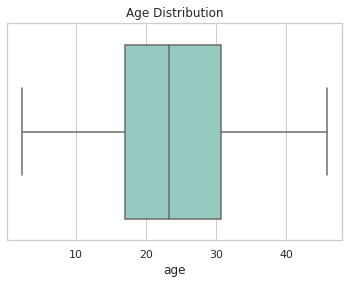

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.boxplot(x="age", data=data, palette="Set3")
plt.title("Age Distribution")

In [6]:
data.age.min(), data.age.max()

(2.3475599373326848, 45.773728755936816)

**Interest Column**

Text(0.5, 1.0, 'Interests Distribution')

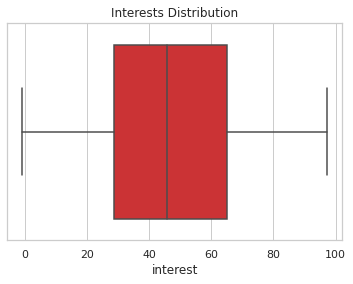

In [7]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="interest", data=data, palette="Set1")
plt.title("Interests Distribution")

In [8]:
data.interest.min(), data.interest.max()

(-0.8528003102534427, 97.1755075384403)

**Success**

In [9]:
data.success.unique()

array([0., 1.])

Text(0.5, 1.0, 'Success ')

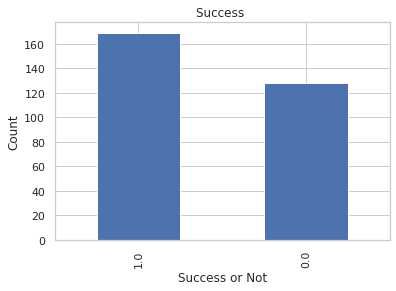

In [10]:
data.success.value_counts().plot(kind='bar')
plt.xlabel("Success or Not")
plt.ylabel("Count")
plt.title("Success ")

<AxesSubplot:xlabel='age', ylabel='interest'>

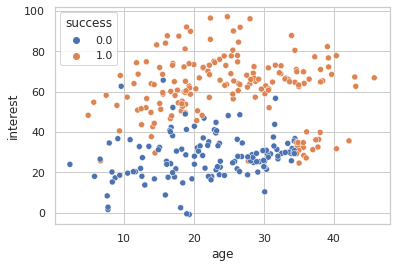

In [11]:
sns.scatterplot(data=data, x="age", y="interest", hue="success")

# Model Preparation and Prediction

**Implement KNN using sklearn api**



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X = data[["age","interest"]]
Y = data["success"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=45)

In [14]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = neigh.predict(X_test)
y_pred

array([1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0.])

In [16]:
accuracy_score(y_test,y_pred)

0.9333333333333333

**Quantify goodness of your model and discuss steps taken for improvement**

Here we have achieved accuracy of 93%. When value of K was 2 we were getting 85% and by increasing value of K to 5 we got 93%.

**Can we use KNN for regression also? Why / Why not?**

KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

**Discuss drawbacks of algorithms such as KNN.**

*Accuracy depends on the quality of the data

*With large data, the prediction stage might be slow

*Sensitive to the scale of the data and irrelevant features

*Require high memory – need to store all of the training data

*Given that it stores all of the training, it can be computationally expensive

**Thank You**